21/06620
Mualuko Nzemia
BSD 
Cat 1

Libraries

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn



   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 6.6 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.1 MB 7.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 7.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
import os
import pandas as pd

folder_path = 'memes/'  

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df['source_file'] = file  
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

In [7]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0                                              title  score  \
0           0  Being an enemy of God, I have to admit it feel...    789   
1           1                                    Jesus Loves You   1815   
2           2  “Sadly this is where we are headed if we don’t...     87   
3           3  The dad is absorbing the gay energy to protect...    212   
4           4  Pretty sure god's got babies to kill and diagn...   3912   

       id           subreddit                                  url  \
0  x9bxxd  religiousfruitcake  https://i.redd.it/1aketcekapm91.jpg   
1  x94ie9  religiousfruitcake  https://i.redd.it/h7sfh9zeapm91.jpg   
2  x9mt4f  religiousfruitcake  https://i.redd.it/hsvupcv8qrm91.jpg   
3  x9ffdh  religiousfruitcake  https://i.redd.it/o7n05bswzpm91.png   
4  x8qmo8  religiousfruitcake  https://i.redd.it/btzgi8h7dkm91.png   

   num_comments body              created             source_file  
0            99  NaN  2022-09-0

In [8]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    606 non-null    int64 
 1   title         606 non-null    object
 2   score         606 non-null    int64 
 3   id            606 non-null    object
 4   subreddit     606 non-null    object
 5   url           606 non-null    object
 6   num_comments  606 non-null    int64 
 7   body          14 non-null     object
 8   created       606 non-null    object
 9   source_file   606 non-null    object
dtypes: int64(3), object(7)
memory usage: 47.5+ KB
None


In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Unnamed: 0         score  num_comments
count   606.00000    606.000000    606.000000
mean    302.50000   1039.123762     65.970297
std     175.08141   2832.711557    108.181677
min       0.00000      1.000000      1.000000
25%     151.25000     86.000000     12.000000
50%     302.50000    214.500000     24.000000
75%     453.75000    751.500000     63.750000
max     605.00000  38415.000000    877.000000


In [9]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Unnamed: 0        0
title             0
score             0
id                0
subreddit         0
url               0
num_comments      0
body            592
created           0
source_file       0
dtype: int64


Visualizing missing values

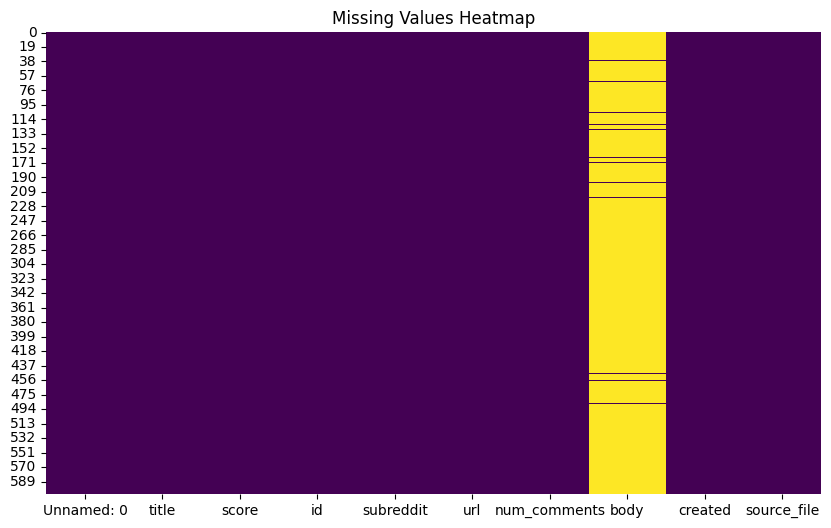

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Exploring categorical columns

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in title:
title
what                                                                                                                   2
Jesus Loves You                                                                                                        1
“Sadly this is where we are headed if we don’t fight the evil is this world” - fruitloop in the comments under this    1
The dad is absorbing the gay energy to protect his children, what a hero...                                            1
Pretty sure god's got babies to kill and diagnose people with cancer                                                   1
                                                                                                                      ..
Ah yes. I am slave to borgar.                                                                                          1
He hit the iamverysmart, confidentiallyincorrect, and religiousfruitcake trifecta                                      1
P

Exploring Numerical Columns distributions

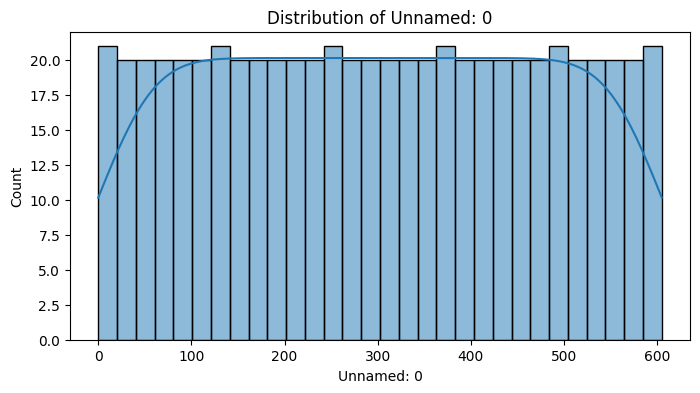

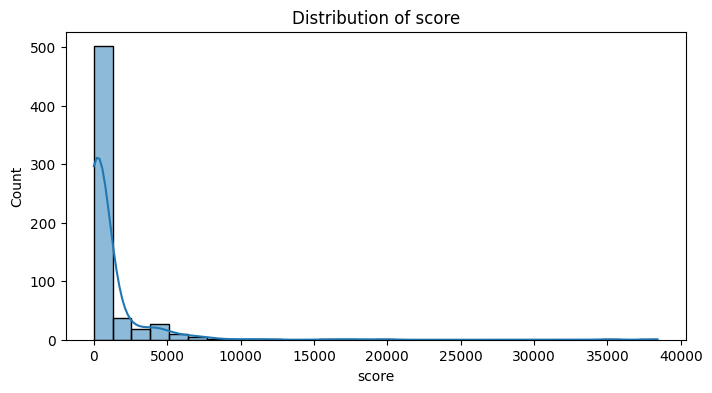

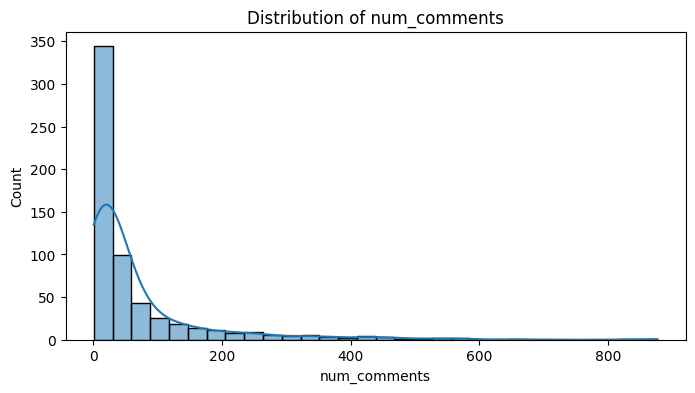

In [14]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

Correlation Analysis

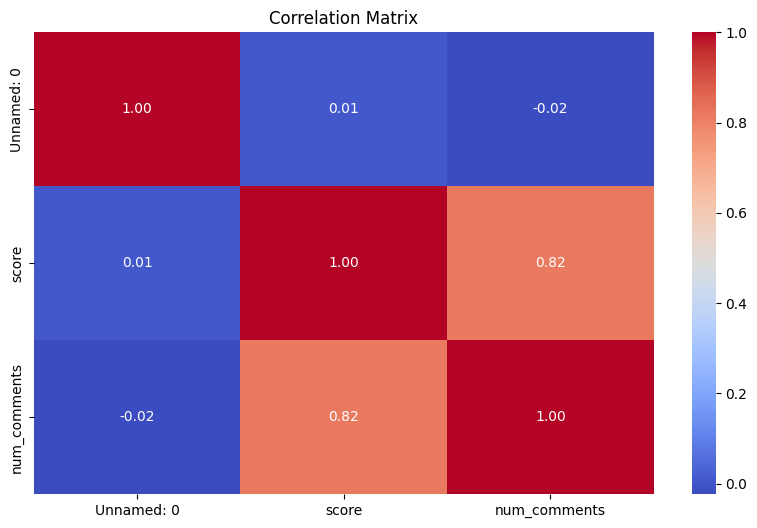

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Data Preprocessing

> Handling missing values

In [21]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Unnamed: 0      0
title           0
score           0
id              0
subreddit       0
url             0
num_comments    0
body            0
created         0
source_file     0
dtype: int64


> Encoding numerical features

In [18]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("\nDataset after encoding categorical columns:")
print(df.head())


Dataset after encoding categorical columns:
   Unnamed: 0  title     score   id  subreddit  url  num_comments  body  \
0    0.000000     64  0.020513  598          0   30      0.111872     0   
1    0.001653    264  0.047222  597          0  301      0.107306     0   
2    0.003306    593  0.002239  603          0  312      0.009132     0   
3    0.004959    424  0.005493  599          0  415      0.028539     0   
4    0.006612    352  0.101812  590          0  217      0.168950     0   

   created  source_file  
0      598            0  
1      597            0  
2      603            0  
3      599            0  
4      590            0  


> Normalizing numerical features

In [19]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nDataset after normalizing numerical columns:")
print(df.head())


Dataset after normalizing numerical columns:
   Unnamed: 0  title     score   id  subreddit  url  num_comments  body  \
0    0.000000     64  0.020513  598          0   30      0.111872     0   
1    0.001653    264  0.047222  597          0  301      0.107306     0   
2    0.003306    593  0.002239  603          0  312      0.009132     0   
3    0.004959    424  0.005493  599          0  415      0.028539     0   
4    0.006612    352  0.101812  590          0  217      0.168950     0   

   created  source_file  
0      598            0  
1      597            0  
2      603            0  
3      599            0  
4      590            0  


Reviewing the dataset

In [22]:
df.head()

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,source_file
0,0.000000,64,0.020513,598,0,30,0.111872,0,598,0
1,0.001653,264,0.047222,597,0,301,0.107306,0,597,0
2,0.003306,593,0.002239,603,0,312,0.009132,0,603,0
3,0.004959,424,0.005493,599,0,415,0.028539,0,599,0
4,0.006612,352,0.101812,590,0,217,0.168950,0,590,0


Saving the preprocessed dataset

In [20]:
df.to_csv('preprocessed_reddit_memes.csv', index=False)
print("Preprocessed dataset saved successfully!")

Preprocessed dataset saved successfully!
